<a href="https://colab.research.google.com/github/panik-79/arxiv_paper_recommendation_model/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook Perform two things...........

# 1 Section:                                                                 
Research Area Subject Area Prediction (Large Scale classification) using shallow Multi-Layer Perceptron (MLP) model

# 2 Section:
Research Paper Recommendation for reading: using sentence transformer model

Research Papers dataset link::
https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts/data


# 1 Section:                                                                 

# Loading tools and dataset

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import csv
from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [79]:
arxiv_data = pd.read_csv("arxiv_data_210930-054931.csv")

In [80]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities,"Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes,"Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n""partition and vote"" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network via Graph Powering,"Graph convolutional networks (GCNs) are powerful tools for graph-structured\ndata. However, they have been recently shown to be vulnerable to topological\nattacks. To enhance adversarial robustness, we go beyond spectral graph theory\nto robust graph theory. By challenging the classical graph Laplacian, we\npropose a new convolution operator t

# Data Cleaning and Preprocessing

In [54]:
arxiv_data.shape

(56181, 3)

In [55]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

In [56]:
arxiv_data.duplicated().sum()

15054

In [57]:
arxiv_data["terms"]

0                                          ['cs.LG']
1                                 ['cs.LG', 'cs.AI']
2                      ['cs.LG', 'cs.CR', 'stat.ML']
3                                 ['cs.LG', 'cs.CR']
4                                          ['cs.LG']
                            ...                     
56176                             ['cs.CV', 'cs.IR']
56177    ['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']
56178                                      ['cs.LG']
56179                ['stat.ML', 'cs.LG', 'math.OC']
56180                  ['cs.LG', 'cs.AI', 'stat.ML']
Name: terms, Length: 56181, dtype: object

In [81]:
# getting unique labels
labels_column = arxiv_data["terms"].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [82]:
# remove duplicate entries based on the "titles" (terms) column
# This filters the DataFrame, keeping only the rows where the titles are not duplicated.
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [83]:
# Filtering the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [ ]:
# It evaluates the given string containing a Python literal or container display (e.g., a list or dictionary) and returns the corresponding Python object.
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

# train and test split.

In [84]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

train_df["terms"]

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


35432           ['cs.LG', 'stat.ML']
33434                      ['cs.CV']
9844                       ['cs.CV']
16392                      ['cs.CV']
16742             ['cs.LG', 'cs.NE']
                    ...             
13083                      ['cs.CV']
25330    ['cs.CV', 'cs.CL', 'cs.LG']
35579                      ['cs.CV']
39230                      ['cs.CV']
29105                      ['cs.CV']
Name: terms, Length: 34741, dtype: object

In [85]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the terms column to a list of lists
terms_list = train_df['terms'].apply(lambda x: eval(x)).tolist()

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit MultiLabelBinarizer on the terms list to build the vocabulary
mlb.fit(terms_list)

# Transform the terms list into a multi-hot encoded representation
multi_hot_encoded = mlb.transform(terms_list)

# Get the vocabulary (terms)
vocab = mlb.classes_

print("Vocabulary:\n")
print(vocab)


Vocabulary:

['14J60 (Primary) 14F05, 14J26 (Secondary)' '60L10, 60L20' '62H30' '62H35'
 '62H99' '65D19' '68' '68Q32' '68T01' '68T05' '68T07' '68T10' '68T30'
 '68T45' '68T99' '68Txx' '68U01' '68U10'
 'E.5; E.4; E.2; H.1.1; F.1.1; F.1.3' 'F.2.2; I.2.7' 'G.3'
 'H.3.1; H.3.3; I.2.6; I.2.7' 'H.3.1; I.2.6; I.2.7' 'I.2' 'I.2.0; I.2.6'
 'I.2.1' 'I.2.10' 'I.2.10; I.2.6' 'I.2.10; I.4.8' 'I.2.10; I.4.8; I.5.4'
 'I.2.10; I.4; I.5' 'I.2.10; I.5.1; I.4.8' 'I.2.1; J.3' 'I.2.6'
 'I.2.6, I.5.4' 'I.2.6; I.2.10' 'I.2.6; I.2.7'
 'I.2.6; I.2.7; H.3.1; H.3.3' 'I.2.6; I.2.8' 'I.2.6; I.2.9' 'I.2.6; I.5.1'
 'I.2.6; I.5.4' 'I.2.7' 'I.2.8' 'I.2; I.2.6; I.2.7' 'I.2; I.4; I.5'
 'I.2; I.5' 'I.2; J.2' 'I.3.7' 'I.4' 'I.4.0' 'I.4.1' 'I.4.3' 'I.4.4'
 'I.4.5' 'I.4.6' 'I.4.6; I.4.8' 'I.4.8' 'I.4.9' 'I.4.9; I.5.4' 'I.4; I.5'
 'I.5.2' 'I.5.4' 'K.3.2' 'astro-ph.IM' 'cond-mat.dis-nn'
 'cond-mat.mtrl-sci' 'cond-mat.soft' 'cond-mat.stat-mech' 'cs.AI' 'cs.AR'
 'cs.CC' 'cs.CE' 'cs.CG' 'cs.CL' 'cs.CR' 'cs.CV' 'cs.CY' 'cs.DB' 'cs

In [86]:
# Choose a sample label
sample_label = train_df["terms"].iloc[1]
print(f"Original label: {sample_label}")

# Convert the sample label to a list of lists, similar to what was done before
sample_label_list = [eval(sample_label)]

# Binarize the sample label using the MultiLabelBinarizer
label_binarized = mlb.transform(sample_label_list)
print(f"Label-binarized representation: {label_binarized}")


Original label: ['cs.CV']
Label-binarized representation: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [87]:
import tensorflow as tf

# Define the maximum sequence length and batch size
max_seqlen = 150
batch_size = 128

# Define the function to create the dataset
def make_dataset(dataframe, is_train):
    # Convert the terms column to a list of lists
    terms_list = dataframe['terms'].apply(lambda x: eval(x)).tolist()

    # Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # Fit MultiLabelBinarizer on the terms list to build the vocabulary
    mlb.fit(terms_list)

    # Transform the terms list into a multi-hot encoded representation
    label_binarized = mlb.transform(terms_list)

    # Convert the abstracts column to a TensorFlow dataset
    abstracts_dataset = tf.data.Dataset.from_tensor_slices(dataframe['abstracts'].values)

    # Create a dataset of labels using the binarized representation
    labels_dataset = tf.data.Dataset.from_tensor_slices(label_binarized)

    # Zip the abstracts and labels datasets together to create a single dataset of tuples
    dataset = tf.data.Dataset.zip((abstracts_dataset, labels_dataset))

    # Shuffle the dataset
    dataset = dataset.shuffle(buffer_size=len(dataframe)) if is_train else dataset

    return dataset.batch(batch_size)


In [88]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [89]:
for abstracts, labels in train_dataset.take(1):
    print("Abstracts:", abstracts)
    print("Labels:", labels)
    print()


Abstracts: tf.Tensor(
[b"We present a protocol to construct your own depth validation dataset for\nnavigation. This protocol, called RDC for Rigid Depth Constructor, aims at\nbeing more accessible and cheaper than already existing techniques, requiring\nonly a camera and a Lidar sensor to get started. We also develop a test suite\nto get insightful information from the evaluated algorithm. Finally, we take\nthe example of UAV videos, on which we test two depth algorithms that were\ninitially tested on KITTI and show that the drone context is dramatically\ndifferent from in-car videos. This shows that a single context benchmark should\nnot be considered reliable, and when developing a depth estimation algorithm,\none should benchmark it on a dataset that best fits one's particular needs,\nwhich often means creating a brand new one. Along with this paper we provide\nthe tool with an open source implementation and plan to make it as\nuser-friendly as possible, to make depth dataset creati

In [90]:
# Define a function to invert the multi-hot encoded labels
def invert_multi_hot(label):
    return [vocab[i] for i, val in enumerate(label) if val == 1]

# Iterate through batches of the training dataset and print the abstract text along with the corresponding labels
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label)}")
    print(" ")


Abstract: b"Tracking the full skeletal pose of the hands and fingers is a challenging\nproblem that has a plethora of applications for user interaction. Existing\ntechniques either require wearable hardware, add restrictions to user pose, or\nrequire significant computation resources. This research explores a new\napproach to tracking hands, or any articulated model, by using an augmented\nrigid body simulation. This allows us to phrase 3D object tracking as a linear\ncomplementarity problem with a well-defined solution. Based on a depth sensor's\nsamples, the system generates constraints that limit motion orthogonal to the\nrigid body model's surface. These constraints, along with prior motion,\ncollision/contact constraints, and joint mechanics, are resolved with a\nprojected Gauss-Seidel solver. Due to camera noise properties and attachment\nerrors, the numerous surface constraints are impulse capped to avoid\noverpowering mechanical constraints. To improve tracking accuracy, multip

In [91]:
# Creating vocabulary with unique words
vocabulary = set()
train_df['abstracts'].apply(lambda x: vocabulary.update(x.lower().split()))
vocabulary_size = len(vocabulary)
print("Vocabulary size:", vocabulary_size)

Vocabulary size: 158943


# Text Vectorization

In [93]:
from tensorflow.keras.layers import TextVectorization

# Initializing a TextVectorization layer
text_vectorizer = TextVectorization(max_tokens=vocabulary_size, ngrams=2, output_mode="tf-idf")

# TextVectorization layer needs to be adapted with the vocabulary from our training set.
text_vectorizer.adapt(train_df["abstracts"].values)


In [95]:
# Mapping Vectorization to Datasets
train_dataset = train_dataset.map(lambda abstracts, terms: (text_vectorizer(abstracts), terms), num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.map(lambda abstracts, terms: (text_vectorizer(abstracts), terms), num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(lambda abstracts, terms: (text_vectorizer(abstracts), terms), num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE)


In [104]:
import tensorflow as tf

# Assuming you have a train_dataset TensorFlow dataset object

# Define the number of elements to inspect
num_elements = 5  # You can change this to inspect more or fewer elements

# Take the first num_elements elements from the dataset
sample_data = train_dataset.take(num_elements)

# Iterate over the sample_data and print each element
for sample in sample_data:
    # Assuming the sample contains input features and labels
    input_features, labels = sample
    print("Input Features:")
    print(input_features)
    print("Labels:")
    print(labels)
    print("="*50)  # Separating each sample with '=' characters


Input Features:
tf.Tensor(
[[298.32437      5.564707     3.5081503  ...   0.           0.
    0.        ]
 [298.32437      7.651472     2.8065202  ...   0.           0.
    0.        ]
 [133.4609       2.086765     0.70163006 ...   0.           0.
    0.        ]
 ...
 [423.93463     11.129414     5.6130404  ...   0.           0.
    0.        ]
 [282.62308      2.086765     4.20978    ...   0.           0.
    0.        ]
 [345.42822      4.8691187    2.8065202  ...   0.           0.
    0.        ]], shape=(128, 158943), dtype=float32)
Labels:
tf.Tensor(
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(128, 164), dtype=int64)
Input Features:
tf.Tensor(
[[423.93463     5.564707    2.8065202 ...   0.          0.
    0.       ]
 [243.36987     5.564707    2.8065202 ...   0.          0.
    0.       ]
 [463.18784     6.9558835   7.0163007 ...   0.          0.
    0.       ]
 ...
 [400.3827      6.9558835   3.5

In [75]:
# import pandas as pd
# import tensorflow as tf

# # Flatten the lists in the "terms" column into strings
# train_df['terms'] = train_df['terms'].apply(lambda x: ' '.join(x))
# val_df['terms'] = val_df['terms'].apply(lambda x: ' '.join(x))
# test_df['terms'] = test_df['terms'].apply(lambda x: ' '.join(x))

# # Now train_df, val_df, and test_df have the "terms" column with strings instead of lists

# # Now you can proceed with creating TensorFlow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((train_df['abstracts'].values, train_df['terms'].values, train_df['titles'].values))
# val_dataset = tf.data.Dataset.from_tensor_slices((val_df['abstracts'].values, val_df['terms'].values, val_df['titles'].values))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_df['abstracts'].values, test_df['terms'].values, test_df['titles'].values))


# model training

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Create shallow MLP model for multi-label classification
model = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(164, activation='sigmoid')  # Output layer with 164 neurons for multi-label classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
272/272 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.6029

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_18" is incompatible with the layer: expected min_ndim=2, found ndim=0. Full shape received: ()
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(), dtype=string)
      • training=False
      • mask=None


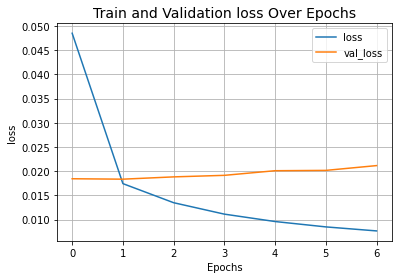

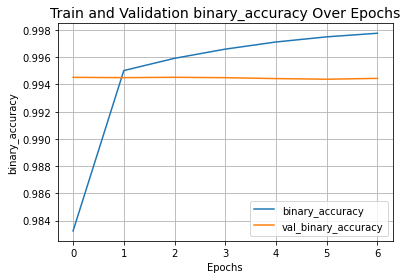

In [ ]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

# Model Evaluation

In [ ]:
# model evaltuation on test and val dataset
_, binary_acc1 = model.evaluate(test_dataset)
_, binary_acc2 = model.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 [==============================] - 9s 559ms/step - loss: 0.0183 - binary_accuracy: 0.9945
Categorical accuracy on the test set: 99.46%.
Categorical accuracy on the validation set: 99.45%.


# Save Model and Text Vectorizer:

In [ ]:
# Save the model
model1.save("models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


# Save the vocabulary
with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

# Load Model and Text Vectorizer:

In [ ]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("models/text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)


In [ ]:
# Load the vocabulary
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)


# Model Prediction

In [ ]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [ ]:
# Example usage
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)


1/1 [==============================] - 2s 2s/step
Predicted Categories: ['cs.LG']


In [ ]:
# Example usage
new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 [==============================] - 0s 459ms/step
Predicted Categories: ['cs.LG' 'cs.AI']


In [ ]:
# great resutls...................................

# =======Section 2========

# 2 Recommendation System

In [8]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [9]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [10]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
1,Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
2,Power up! Robust Graph Convolutional Network via Graph Powering
3,Releasing Graph Neural Networks with Differential Privacy Guarantees
4,Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
...,...
41100,An experimental study of graph-based semi-supervised classification with additional node information
41101,Bayesian Differential Privacy through Posterior Sampling
41102,Mining Spatio-temporal Data on Industrialization from Historical Registries
41103,Wav2Letter: an End-to-End ConvNet-based Speech Recognition System


# Sentence Transformers

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
from scipy.spatial.distance import cosine
import pickle

nltk.download("punkt")
nltk.download("stopwords")

# Example sentences (assuming `arxiv_data` is defined)
sentences = arxiv_data["titles"]

# Tokenization and normalization
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
stop_words = set(stopwords.words('english'))
normalized_sentences = [[word for word in sentence if word.isalnum() and word not in stop_words] for sentence in tokenized_sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(normalized_sentences, vector_size=100, window=5, min_count=1, sg=1)

# Saving the Word2Vec model
with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(word2vec_model, f)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Function to generate sentence embeddings by averaging word embeddings
def sentence_embedding(sentence, model):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Generate sentence embeddings
all_sentence_embeddings = [sentence_embedding(sentence, word2vec_model) for sentence in normalized_sentences]


# Why select all-MiniLM-L6-v2?

All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs. Source

Its small in size 80 MB with good performance.

# Print the embeddings

In [29]:
# c = 0
# # Iterate over pairs of sentences and their corresponding embeddings
# for sentence, normalized_sentence in zip(sentences, normalized_sentences):
#     # Generate sentence embedding
#     vectors = []
#     for word in normalized_sentence:
#         if word in word2vec_model.wv:
#             vectors.append(word2vec_model.wv[word])
#     if vectors:
#         sentence_embedding = np.mean(vectors, axis=0)
#     else:
#         sentence_embedding = np.zeros(word2vec_model.vector_size)

#     # Print information
#     print("Sentence:", sentence)
#     print("Embedding length:", len(sentence_embedding)) # list of floats
#     print("")

#     # Break out of the loop after printing information for the first 5 sentences
#     if c >= 5:
#         break
#     c += 1

# Save files

In [30]:
# Saving sentences and corresponding embeddings
with open('embeddings.pkl', 'wb') as f:
    pickle.dump(all_sentence_embeddings, f)

with open('sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

# Recommendation for similar papers

In [31]:
# Load saved files
sentences = pickle.load(open('sentences.pkl','rb'))
word2vec_model = pickle.load(open('word2vec_model.pkl','rb'))
all_sentence_embeddings = pickle.load(open('embeddings.pkl','rb'))

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

def recommendation(input_paper, embeddings, sentences):
    # Calculate embeddings for the input paper
    input_embedding = sentence_embedding(input_paper, word2vec_model)

    # Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
    cosine_scores = cosine_similarity([input_embedding], embeddings)[0]

    # Get the indices of the top-k most similar papers based on cosine similarity.
    top_similar_papers_indices = np.argsort(cosine_scores)[::-1][:5]

    # Retrieve the titles of the top similar papers.
    papers_list = [sentences[i] for i in top_similar_papers_indices]

    return papers_list

In [41]:
input_paper = "Neural Network"
input_paper_tokens = word_tokenize(input_paper.lower())
recommendations = recommendation(input_paper_tokens, all_sentence_embeddings, sentences)
print("Top 5 Recommended Papers:")
for i, paper in enumerate(recommendations, 1):
    print(f"{i}. {paper}")

Top 5 Recommended Papers:
1. A Neural Network for Semigroups
2. SGAD: Soft-Guided Adaptively-Dropped Neural Network
3. Neural Network Branch-and-Bound for Neural Network Verification
4. MGIC: Multigrid-in-Channels Neural Network Architectures
5. Which Minimizer Does My Neural Network Converge To?


In [42]:
import requests
from bs4 import BeautifulSoup

In [46]:
base_url = "https://arxiv.org/search/?query={}&searchtype=all&abstracts=show&order=-announced_date_first&size=50"

final_urls = []
titles = []
abstracts = []
for paper in recommendations:
    query = '+'.join(paper.split())
    url = base_url.format(query)
    web = requests.get(url)
    soup = BeautifulSoup(web.content,"html.parser")
    links = soup.find_all("p", attrs={'class':'list-title is-inline-block'})
    for i in range(len(links)):
      final_urls.append(links[i].find_all("a")[0].get('href'))

for i in range(len(final_urls)):
  web2 = requests.get(final_urls[i])
  soup2 = BeautifulSoup(web2.content,"html.parser")
  title = soup2.find("h1",attrs={'class':'title mathjax'}).text
  title=title.strip("Title").strip(':')
  titles.append(title)
  abstract = soup2.find('blockquote',attrs={'class':'abstract mathjax'})
  abstract=abstract.text.strip('\nAbstract:')
  abstracts.append(abstract)


In [47]:
len(titles)

41

In [ ]:
abstracts[-7]

'Motif discovery is gaining increasing attention in the domain of functional data analysis. Functional motifs are typical "shapes" or "patterns" that recur multiple times in different portions of a single curve and/or in misaligned portions of multiple curves. In this paper, we define functional motifs using an additive model and we propose funBIalign for their discovery and evaluation. Inspired by clustering and biclustering techniques, funBIalign is a multi-step procedure which uses agglomerative hierarchical clustering with complete linkage and a functional distance based on mean squared residue scores to discover functional motifs, both in a single curve (e.g., time series) and in a set of curves. We assess its performance and compare it to other recent methods through extensive simulations. Moreover, we use funBIalign for discovering motifs in two real-data case studies; one on food price inflation and one on temperature changes.\n    '

In [ ]:
final_urls[-1]

'https://arxiv.org/abs/2403.08011'